In [2]:
# pandas, numpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series,DataFrame

# matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# to make the plots visible in notebook
%matplotlib inline 



In [4]:
#importing data

train = pd.read_csv('C:/Users/Louise/Projects/Titanic/train.csv')
test = pd.read_csv('C:/Users/Louise/Projects/Titanic//test.csv')
train_test_data = [train, test]

In [5]:
#Understanding the data

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print ('TRAINING DATA\n')
train.info()
print ("----------------------------------------\n")
print ('TESTING DATA\n')
test.info()

TRAINING DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------

TESTING DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int

In [9]:
print ('#MISSING VALUES IN TRAINING DATA')
train.isnull().sum()

#MISSING VALUES IN TRAINING DATA


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print ('#MISSING VALUES IN TESTING DATA')
test.isnull().sum()

#MISSING VALUES IN TESTING DATA


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [12]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Rosenbaum, Miss. Edith Louise",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [13]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [30]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


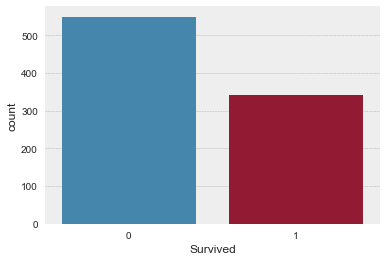

In [31]:
sns.countplot(x='Survived',data=train)

In [15]:
print ("Survived: %i (%.1f%%)" %(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)" %(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i" % (len(train)))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [16]:
#Pclass vs Survival

train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
#male and female survivors in each class
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

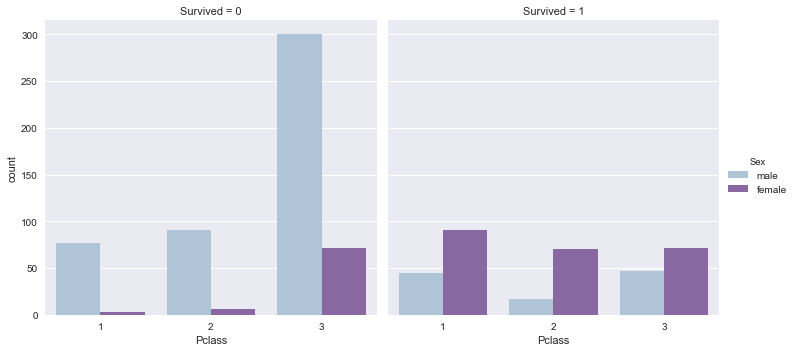

In [18]:
sns.factorplot(x="Pclass", hue="Sex",data=train, col="Survived",size=5, kind="count",aspect=1, palette="BuPu");

In [19]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

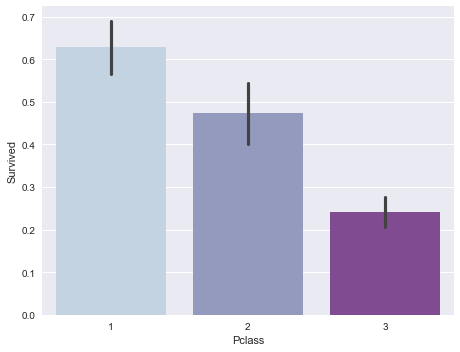

In [20]:
sns.factorplot(x="Pclass", y="Survived", data=train,size=5, kind="bar", palette="BuPu", aspect=1.3)

In [21]:
#Sex vs Survival

train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

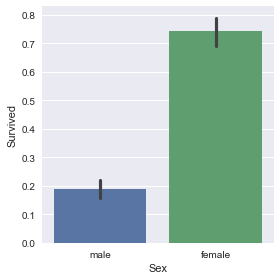

In [23]:
sns.factorplot(x="Sex", y="Survived", data = train, kind="bar")

In [24]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

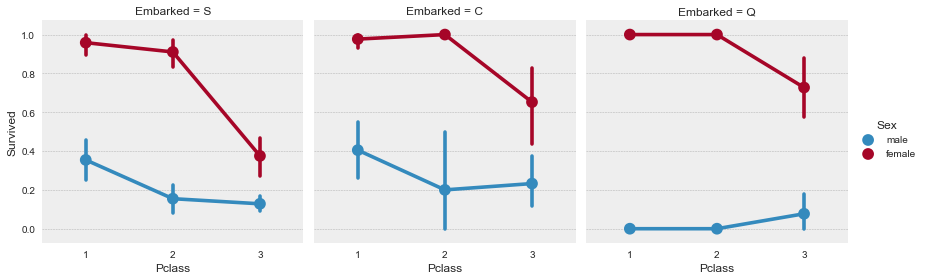

In [25]:
plt.style.use('bmh')
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

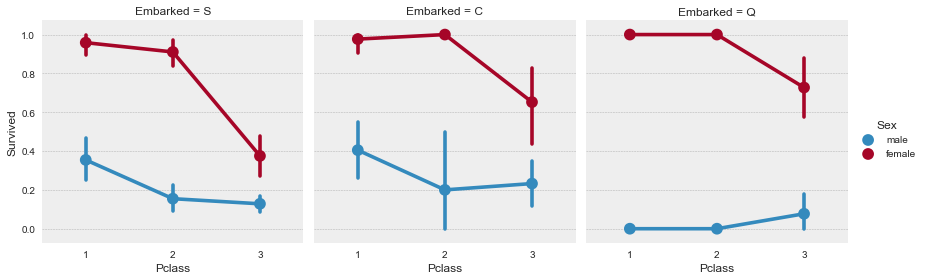

In [26]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [27]:
#sex vs survival

train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [29]:
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

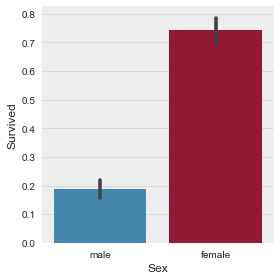

In [29]:
sns.factorplot(x="Sex", y="Survived", data = train, kind = "bar")

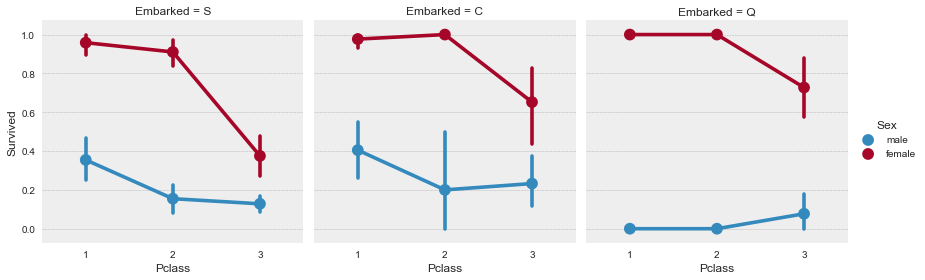

In [30]:
plt.style.use('bmh')
sns.factorplot(x='Pclass', y= 'Survived', hue ="Sex", col = "Embarked", data = train)

In [31]:
# Filling NaN values
for dataset in train_test_data:
    avg = dataset['Age'].mean()
    std = dataset['Age'].std()
    null_count = dataset['Age'].isnull().sum()
    random = np.random.randint(avg-std, avg+std, size=null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = random
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\Doc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [32]:
age_survived = train['Age'][train['Survived'] == 1]
age_not_survived = train['Age'][train['Survived'] == 0]

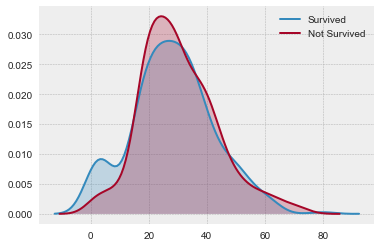

In [33]:
# Plot
plt.style.use('bmh')
sns.kdeplot(age_survived, shade=True, label = 'Survived')
sns.kdeplot(age_not_survived, shade=True, label = 'Not Survived')

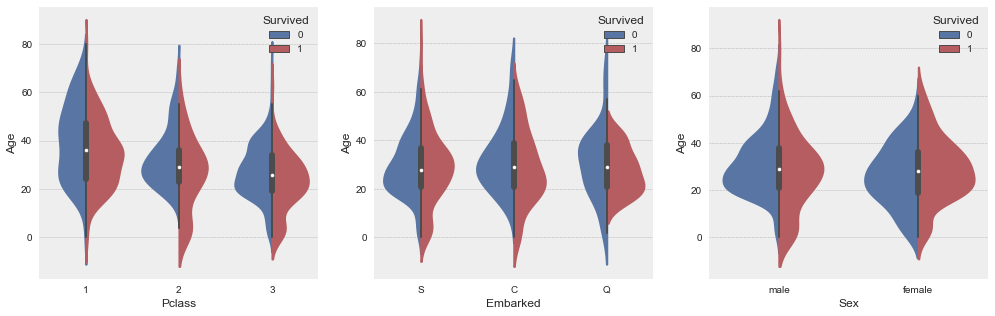

In [34]:
plt.style.use('bmh')
sns.set_color_codes("deep")
fig , (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(17,5))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, palette={0: "b", 1: "r"},split=True, ax=ax1)
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train,palette={0: "b", 1: "r"}, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train,palette={0: "b", 1: "r"}, split=True, ax=ax3)

In [35]:
#Embarked vs Survival

train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train['Embarked'] = train['Embarked'].fillna('S')
                                        

In [37]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [39]:
train.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

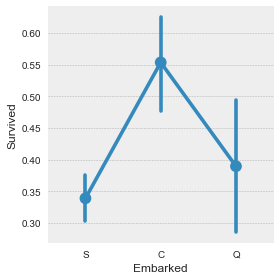

In [40]:
sns.factorplot(x='Embarked', y = 'Survived', data  = train)

In [41]:
# Fare vs Survival

#filling the missing value with median

test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train.Embarked.value_counts()



S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
test['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [43]:
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived = train["Fare"][train["Survived"] == 1]

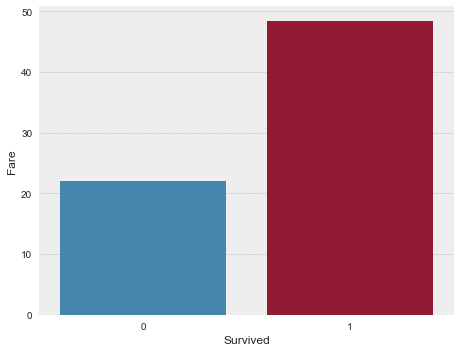

In [44]:
sns.factorplot(x="Survived", y="Fare", data=train,size=5, kind="bar", ci=None, aspect=1.3)

In [45]:
train['Fare'][train['Survived']==1]

1       71.2833
2        7.9250
3       53.1000
8       11.1333
9       30.0708
10      16.7000
11      26.5500
15      16.0000
17      13.0000
19       7.2250
21      13.0000
22       8.0292
23      35.5000
25      31.3875
28       7.8792
31     146.5208
32       7.7500
36       7.2292
39      11.2417
43      41.5792
44       7.8792
47       7.7500
52      76.7292
53      26.0000
55      35.5000
56      10.5000
58      27.7500
61      80.0000
65      15.2458
66      10.5000
         ...   
809     53.1000
820     93.5000
821      8.6625
823     12.4750
827     37.0042
828      7.7500
829     80.0000
830     14.4542
831     18.7500
835     83.1583
838     56.4958
839     29.7000
842     31.0000
849     89.1042
853     39.4000
855      9.3500
856    164.8667
857     26.5500
858     19.2583
862     25.9292
865     13.0000
866     13.8583
869     11.1333
871     52.5542
874     24.0000
875      7.2250
879     83.1583
880     26.0000
887     30.0000
889     30.0000
Name: Fare, Length: 342,

In [46]:
# Parch vs Survival

train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [47]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [48]:
train.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

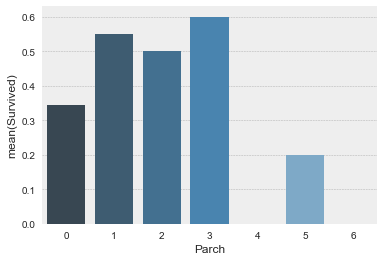

In [49]:
sns.barplot(x='Parch',y='Survived', data=train, ci=None, palette="Blues_d")

In [50]:
# Sibsip vs Survival

train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [52]:
train.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

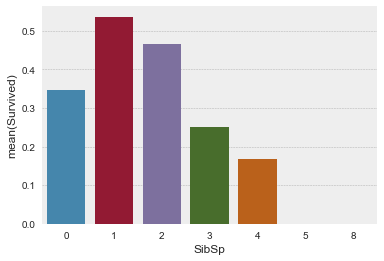

In [53]:
sns.barplot(x= 'SibSp', y = 'Survived' , data = train , ci = None)

In [54]:
pd.crosstab(train['SibSp'], train['Parch'])

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


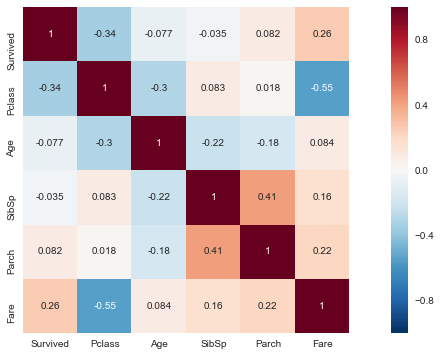

In [55]:
# Correlation of features

# Negative numbers : inverse proportionality

# Positive numbers : direct proportionality

plt.figure(figsize=(15,6))

sns.heatmap(train.drop('PassengerId',axis=1).corr(), square=True, annot=True, center=0)

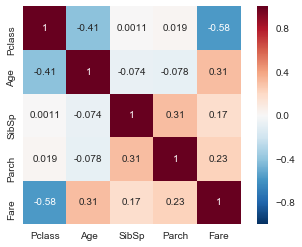

In [56]:
sns.heatmap(test.drop('PassengerId',axis=1).corr(), square=True, annot=True, center=0)

In [57]:
y = train.corr(method='pearson', min_periods=1)

In [58]:
y

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.027234,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077253,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.304064,0.083081,0.018443,-0.549500
Age,0.027234,-0.077253,-0.304064,1.000000,-0.222777,-0.177542,0.083774
SibSp,-0.057527,-0.035322,0.083081,-0.222777,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.177542,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.083774,0.159651,0.216225,1.000000


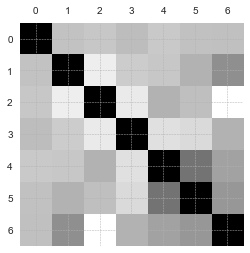

In [59]:
plt.matshow(train.corr())

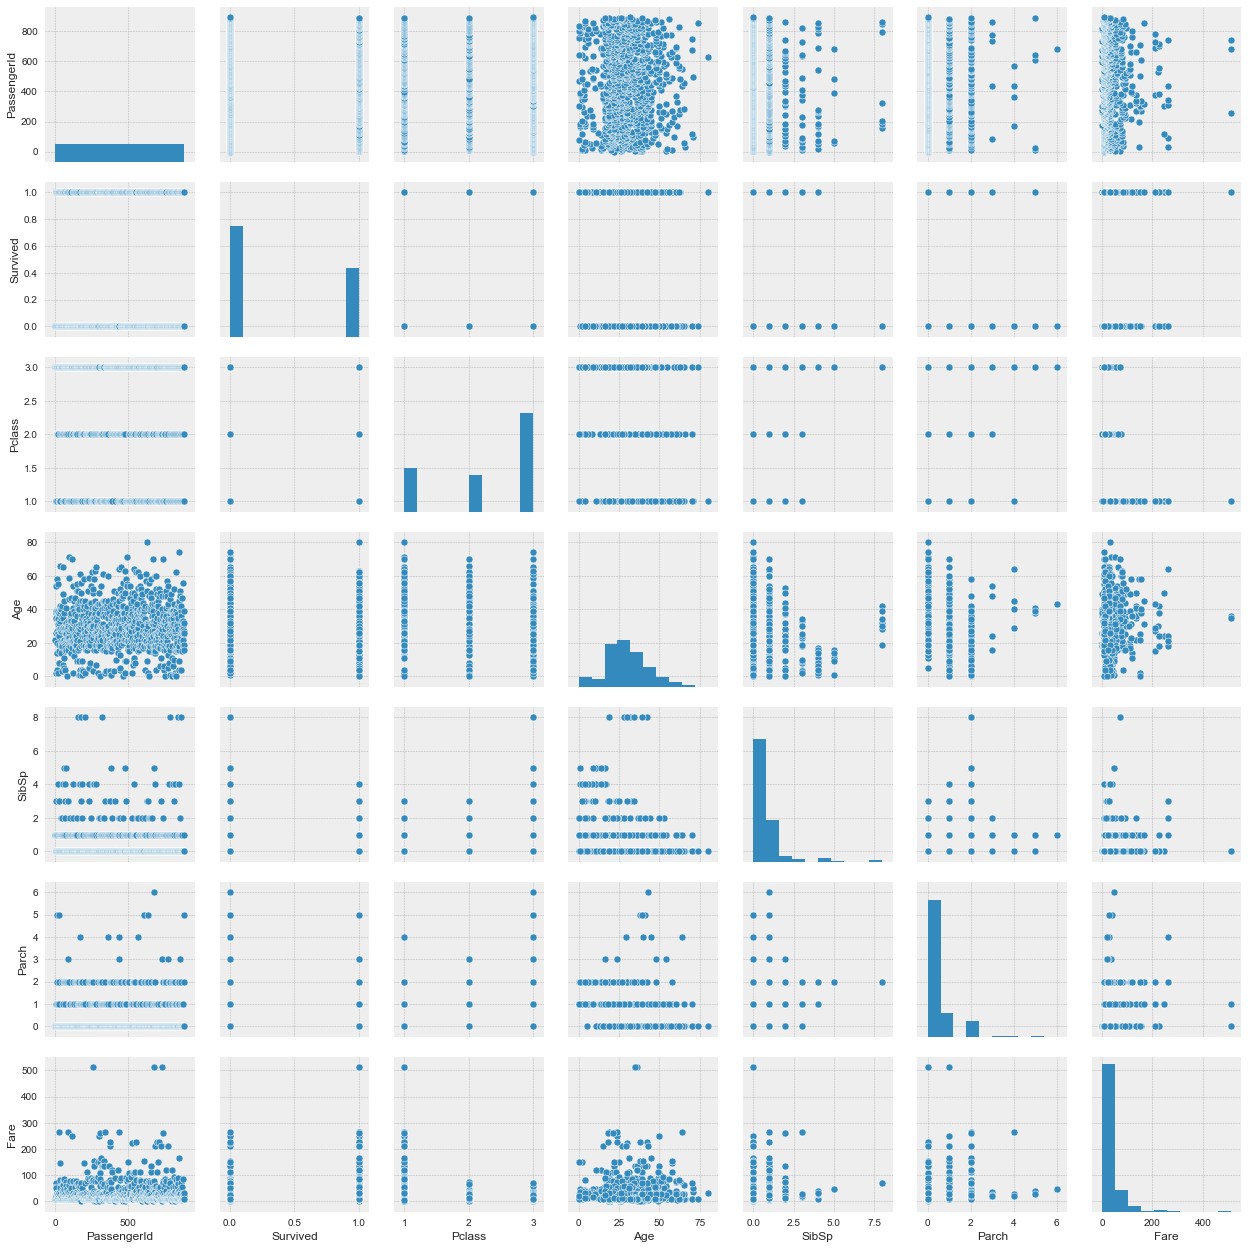

In [60]:
sns.pairplot(train)

In [61]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [62]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [63]:
train.dtypes.index

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [64]:
#Removing PId
del train['PassengerId']
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [65]:
#We need Pclass
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [66]:
#Is there any correlation between the passenger's Title and chance of his/her Survival?

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

# Delete the 'Name' columns from datasets
del train['Name']
del test['Name']

C:\Users\Doc\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Doc\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [67]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [68]:
pd.crosstab(train['Title'], train['Pclass'])

Pclass,1,2,3
Title,,,
Capt,1,0,0
Col,2,0,0
Countess,1,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28


In [69]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [70]:
for data in train_test_data:
    data['Title'] = data['Title'].replace(['Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'],'Miss')
    data['Title'] = data['Title'].replace(['Mme', 'Lady'],'Mrs')   
    
train.groupby('Title').Survived.mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.795276
Others    0.318182
Name: Survived, dtype: float64

In [71]:
for data in train_test_data:
    data['Title'] = data['Title'].map({ 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, "Others":4 }).astype(int)

In [72]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S,2
1,1,1,female,38,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,35,1,0,113803,53.1000,C123,S,3
4,0,3,male,35,0,0,373450,8.0500,NaN,S,2


In [73]:
for data in train_test_data:
    del data['Title']

In [74]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35,1,0,113803,53.1000,C123,S
4,0,3,male,35,0,0,373450,8.0500,NaN,S


In [75]:
def person(per):
    age,sex = per
    return 'child' if age < 16 else sex

train['Person'] = train[['Age', 'Sex']].apply(person, axis=1)
test['Person'] = test[['Age', 'Sex']].apply(person, axis=1)

# As 'Sex' column is not required.
del train['Sex']
del test['Sex']



In [76]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,0,3,22,1,0,A/5 21171,7.2500,NaN,S,male
1,1,1,38,1,0,PC 17599,71.2833,C85,C,female
2,1,3,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,1,1,35,1,0,113803,53.1000,C123,S,female
4,0,3,35,0,0,373450,8.0500,NaN,S,male


In [77]:
train['Person'].value_counts()

male      531
female    270
child      90
Name: Person, dtype: int64

In [78]:
train.groupby('Person').Survived.mean()

Person
child     0.577778
female    0.755556
male      0.161959
Name: Survived, dtype: float64

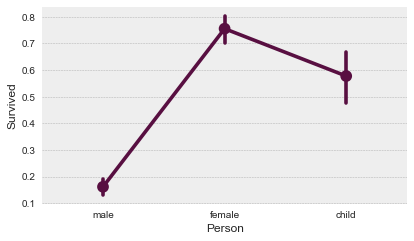

In [79]:
g = sns.PairGrid(train, y_vars="Survived",x_vars="Person",size=3.5, aspect=1.7)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])

In [80]:
for data in train_test_data:
    data['Person'] = data['Person'].map({ 'female':0, 'male':1, 'child':3 }).astype(int)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,0,3,22,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,38,1,0,PC 17599,71.2833,C85,C,0
2,1,3,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,35,1,0,113803,53.1000,C123,S,0
4,0,3,35,0,0,373450,8.0500,NaN,S,1


In [81]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [1]:
for data in train_test_data:
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

NameError: name 'train_test_data' is not defined

In [83]:
# Divide 'Age' into groups

a = pd.cut(train['Age'], 5)

print (train.groupby(a).Survived.mean())

Age
(-0.08, 16.0]    0.545455
(16.0, 32.0]     0.352018
(32.0, 48.0]     0.368627
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64


In [84]:
# Assign number to Age limits
for data in train_test_data:
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4  

In [85]:
train['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [86]:


f = pd.qcut(train['Fare'], 4)
print (train.groupby(f).Survived.mean())

Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64


In [87]:
for data in train_test_data:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

In [88]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,0,3,1,1,0,A/5 21171,0,NaN,0,1
1,1,1,2,1,0,PC 17599,3,C85,1,0
2,1,3,1,0,0,STON/O2. 3101282,1,NaN,0,0
3,1,1,2,1,0,113803,3,C123,0,0
4,0,3,2,0,0,373450,1,NaN,0,1


In [89]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,892,3,2,0,0,330911,0,NaN,2,1
1,893,3,2,1,0,363272,0,NaN,0,0
2,894,2,3,0,0,240276,1,NaN,2,1
3,895,3,1,0,0,315154,1,NaN,0,1
4,896,3,1,1,1,3101298,1,NaN,0,0


In [90]:
for data in train_test_data:
    data['Family'] = data['Parch'] + data['SibSp']
    data['Family'].loc[data['Family'] > 0] = 1
    data['Family'].loc[data['Family'] == 0] = 0

for data in train_test_data:
    del data['Parch']
    del data['SibSp']



C:\Users\Doc\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
train.head()

,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Person,Family
0,0,3,1,A/5 21171,0,NaN,0,1,1
1,1,1,2,PC 17599,3,C85,1,0,1
2,1,3,1,STON/O2. 3101282,1,NaN,0,0,0
3,1,1,2,113803,3,C123,0,0,1
4,0,3,2,373450,1,NaN,0,1,0


In [92]:
for data in train_test_data:
    del data['Cabin']
    del data['Ticket']

In [93]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,Person,Family
0,0,3,1,0,0,1,1
1,1,1,2,3,1,0,1
2,1,3,1,1,0,0,0
3,1,1,2,3,0,0,1
4,0,3,2,1,0,1,0


In [94]:
# Ml
# Importing modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [97]:
X = train.drop('Survived', axis=1)
y = train.Survived

# Split into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Shape of you
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(712, 6)
(712L,)
(179, 6)
(179L,)


In [102]:
# RF
rtree_clf = RandomForestClassifier(n_estimators=100)
rtree_clf.fit(X_train, y_train)
y_pred = rtree_clf.predict(X_test)
print ('Score: %.2f%%' % (round(rtree_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 81.56%
Accuracy: 0.82


In [97]:
#SVM
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
print ('Score: %.2f%%' % (round(svc_clf.score(X_test, y_test)*100, 4)))
print ('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)))

Score: 79.89%
Accuracy: 0.80


In [98]:
#Submission

submission = pd.DataFrame({
    "PassengerId" : test['PassengerId'],
    "Survived" : rtree_clf.predict(test.drop('PassengerId', axis=1))
})

In [99]:
# submission.to_csv('titanic.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [102]:
submission.to_csv('Submission.csv')